In [1]:
#import libraries
%matplotlib inline
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score, accuracy_score

plt.style.use('ggplot')

/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
#overview of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [4]:
#make sure the file loaded correctly
df.sample(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
99357,67081.0,-1.462617,-1.064372,1.951649,1.159679,1.328477,-0.331505,-0.355646,0.136342,-0.335348,...,0.162749,-0.010290,0.269414,-0.548465,-0.139079,-0.398304,-0.091747,-0.065035,106.47,0
229569,145972.0,1.842036,-1.063061,-1.887011,-0.120195,-0.160711,-0.757964,0.314649,-0.488008,-0.786565,...,-0.403854,-0.948686,-0.020000,-0.701299,-0.045052,0.244669,-0.082088,-0.032187,208.80,0
273077,165408.0,1.911048,-0.952896,-1.394609,-0.545441,-0.041751,0.303757,-0.388208,0.001604,-0.691858,...,-0.000849,0.560823,0.145351,-0.982272,-0.306640,0.883744,-0.018273,-0.061816,80.69,0
141457,84336.0,-0.612001,0.747493,1.438101,0.294829,0.245795,-0.023994,0.647168,0.206063,-0.207607,...,0.046013,0.166884,-0.154046,0.188683,0.095940,-0.531232,-0.078534,0.021961,16.99,0
143081,85108.0,-10.545677,-13.354221,0.105787,-0.222120,7.611642,-7.456472,-5.231577,1.199232,2.015885,...,1.079682,-1.926015,0.189187,0.070397,0.398897,-1.418427,0.089662,-1.969413,194.78,0
161359,114125.0,1.713668,-1.303516,-2.844035,-0.387761,0.103920,-1.157691,0.818702,-0.576883,-1.344193,...,0.077814,0.190932,-0.399021,-0.417356,0.419672,1.001831,-0.181366,-0.059995,284.60,0
104100,68910.0,-0.727210,0.670540,1.302960,-0.570789,0.861339,-0.273309,0.505587,0.211399,-0.678291,...,-0.107304,-0.474192,-0.006031,-0.368723,-0.430971,-0.064455,0.074043,0.128605,1.29,0
114918,73673.0,-0.575569,-0.951349,2.022438,-2.380164,-0.404257,-0.698943,-0.418529,-0.135366,-2.082733,...,-0.249153,-0.408110,0.152674,-0.012913,-0.457077,-0.586500,-0.043395,-0.085676,28.00,0
167474,118709.0,1.757259,-0.023838,0.944493,3.773188,-0.820666,0.855771,-1.165241,0.483432,-0.100729,...,0.281617,0.811455,0.275421,-0.041433,-0.586655,-0.045673,0.041143,-0.027230,12.13,0
200327,133390.0,1.802476,-0.457331,0.201813,1.331508,-0.950422,-0.052044,-0.835909,0.227073,1.025620,...,0.124821,0.370734,0.252397,0.013991,-0.422036,-0.781684,0.062486,-0.024032,45.00,0


# The only non-transformed variables to work with are:
- Time
- Amount
- Class (1:fraud, 0:not_fraud)

In [5]:
#numerical summary -> only non-anonymized columns of interest
pd.set_option('precision', 3)
df.loc[:, ['Time', 'Amount']].describe()

,Time,Amount
count,284807.000,284807.000
mean,94813.860,88.350
std,47488.146,250.120
min,0.000,0.000
25%,54201.500,5.600
50%,84692.000,22.000
75%,139320.500,77.165
max,172792.000,25691.160


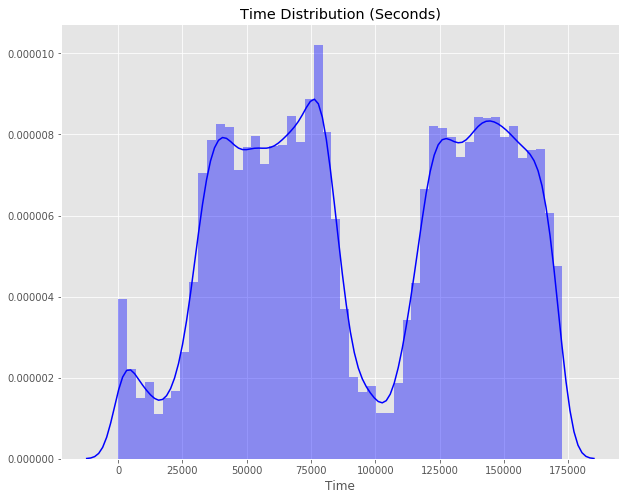

In [6]:
#plot the time feature
plt.figure(figsize=(10,8), )
plt.title('Time Distribution (Seconds)')

sns.distplot(df['Time'],color='blue');

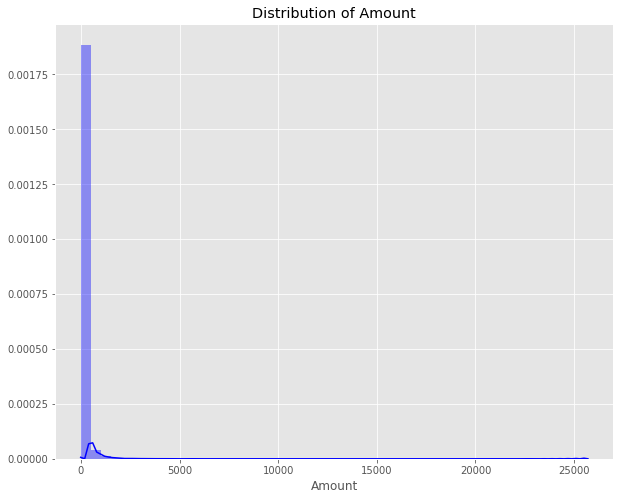

In [7]:
#plot the amount feature
plt.figure(figsize=(10,8))
plt.title('Distribution of Amount')
sns.distplot(df['Amount'],color='blue');

In [8]:
fraud = df['Class'].value_counts()[1]
nonfraud = df['Class'].value_counts()[0]

print(f'Fraudulent:{fraud}, Non-fraudulent:{nonfraud}')
print(f'Ratio of fraud to non-fraud: {fraud}/{nonfraud} ({fraud/nonfraud*100:.3f}%)')

Fraudulent:492, Non-fraudulent:284315
Ratio of fraud to non-fraud: 492/284315 (0.173%)


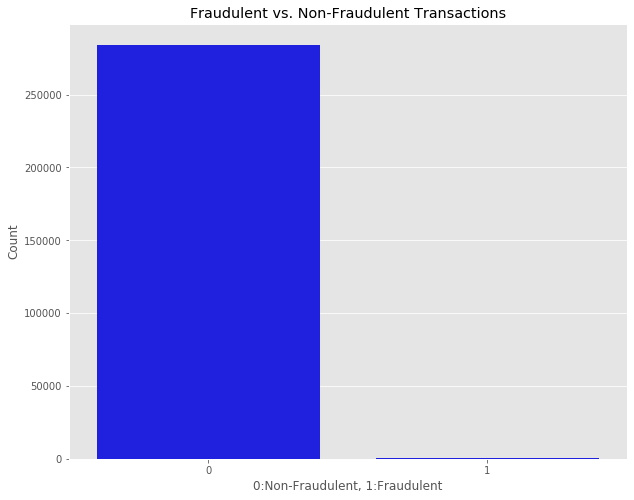

In [9]:
#fraud vs. non-fraud transactions
plt.figure(figsize=(10,8))
sns.barplot(x=df['Class'].value_counts().index,y=df['Class'].value_counts(),color='blue')
plt.title('Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('0:Non-Fraudulent, 1:Fraudulent');
            

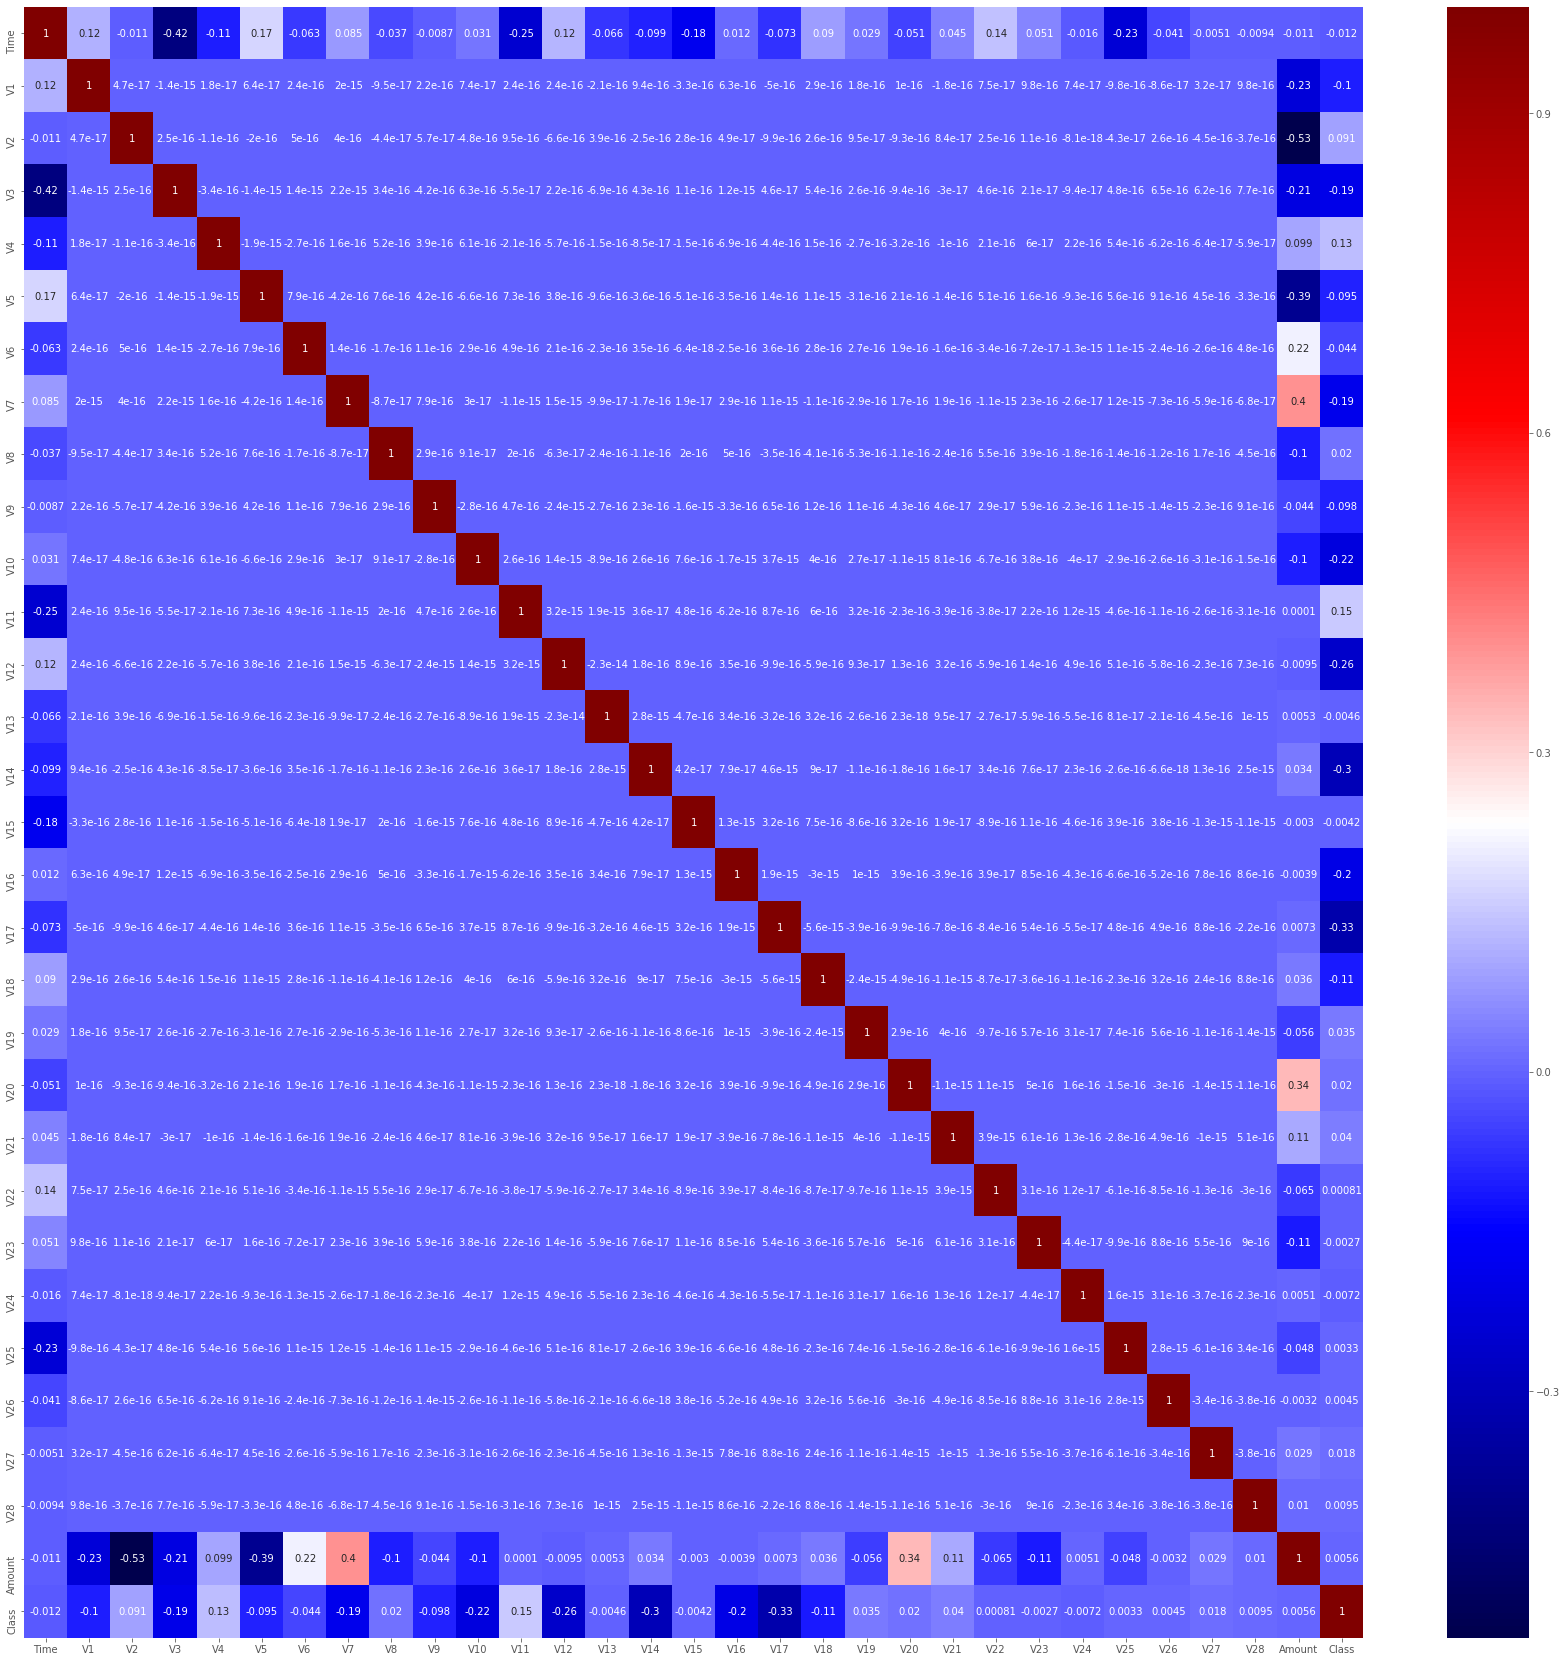

In [10]:
#heatmap to find any high correlations

fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(data=df.corr(), cmap="seismic", ax=ax, annot=True)
plt.show();

# Highest correlations come from:
- Time & V3 (-0.42)
- Amount & V2 (-0.53)  
- Amount & V4 (0.4)

While these correlations are high, I don't expect it to run the risk of multicollinearity.

# Notes on using StandardScaler

StandardScaler : It transforms the data in such a manner that it has mean as 0 and standard deviation as 1. In short, it standardizes the data. Standardization is useful for data which has negative values. It arranges the data in normal distribution. It is more useful in classification than regression. You can read this blog of mine.

StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance. Unit variance means dividing all the values by the standard deviation.

Normalizer : It squeezes the data between 0 and 1. It performs normalization. Due to the decreased range and magnitude, the gradients in the training process do not explode and you do not get higher values of loss. Is more useful in regression than classification. You can read this blog of mine.

In [11]:
#use StandardScaler on Time and Amount

time_scaler = StandardScaler()
amt_scaler = StandardScaler()

#time
scaled_time = time_scaler.fit_transform(df[['Time']])
time_list = [item for sublist in scaled_time.tolist() for item in sublist]
scaled_time = pd.Series(time_list)

#amount
scaled_amt = amt_scaler.fit_transform(df[['Amount']])
amt_list = [item for sublist in scaled_amt.tolist() for item in sublist]
scaled_amt = pd.Series(amt_list)

In [12]:
#concatenate amt and time into original df
df = pd.concat([df, scaled_amt.rename('scaled_amount'), scaled_time.rename('scaled_time')], axis=1)

In [13]:
#drop original amt and time columns
df.drop(['Amount', 'Time'], axis=1, inplace=True)

In [14]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.360,-0.073,2.536,1.378,-0.338,0.462,0.240,0.099,0.364,0.091,...,0.278,-0.110,0.067,0.129,-0.189,0.134,-0.021,0,0.245,-1.997
1,1.192,0.266,0.166,0.448,0.060,-0.082,-0.079,0.085,-0.255,-0.167,...,-0.639,0.101,-0.340,0.167,0.126,-0.009,0.015,0,-0.342,-1.997
2,-1.358,-1.340,1.773,0.380,-0.503,1.800,0.791,0.248,-1.515,0.208,...,0.772,0.909,-0.689,-0.328,-0.139,-0.055,-0.060,0,1.161,-1.997
3,-0.966,-0.185,1.793,-0.863,-0.010,1.247,0.238,0.377,-1.387,-0.055,...,0.005,-0.190,-1.176,0.647,-0.222,0.063,0.061,0,0.141,-1.997
4,-1.158,0.878,1.549,0.403,-0.407,0.096,0.593,-0.271,0.818,0.753,...,0.798,-0.137,0.141,-0.206,0.502,0.219,0.215,0,-0.073,-1.997


# Time for Train-Test-Split
- 60% Training
- 20% Validation
- 20% Test

In [15]:
#drop the predicted column
data = df.drop(columns=['Class'])
answer = df['Class']


In [16]:
X_break, X_test, y_break, y_test = train_test_split(data, answer, \
                                                    test_size=0.2, stratify=df['Class'],
                                                    random_state=42)

#random_state generates a set kind of deck for each random state. 42 will always be the same kind of split
X_train, X_val, y_train, y_val = train_test_split(X_break, y_break, \
                                                    test_size=0.25, stratify=y_break,
                                                    random_state=42)

# To deal with the imbalanced classes, we will use undersampling

In [17]:
X_train_under, y_train_under = RandomUnderSampler(random_state=42).fit_sample(X_train,y_train)
X_val_under, y_val_under = RandomUnderSampler(random_state=42).fit_sample(X_val,y_val)

# Logistic Regression

In [18]:
# Run CV with 5 folds (logit)

penalty = ['l2']
C = np.logspace(0, 4, 10, 100, 1000)
param_grid = dict(C=C, penalty=penalty)

logistic = linear_model.LogisticRegression(solver='lbfgs', max_iter=10000)
logistic_grid = GridSearchCV(logistic, param_grid, cv=5, scoring='roc_auc', verbose=10, n_jobs=-1)
logistic_grid.fit(X_train_under, y_train_under)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  33 out of  50 | elapsed:    2.0s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done  39 out of  50 | elapsed:    2.3s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:    2.6s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    3.5s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=10000, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': array([1.00000000e+00, 2.15443469e+01, 4.64158883e+02, 1.00000000e+04,
       2.15443469e+05, 4.64158883e+06, 1.00000000e+08, 2.15443469e+09,
       4.64158883e+10, 1.00000000e+12]),
                         'penalty': ['l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
        

# Support Vector Machine (SVM)

In [19]:
# # Run CV with 5 folds (SVM)

# C = [1]
# gammas = [0.001, 0.1]
# param_grid = dict(C=C, gamma=gammas)

# svm1 = svm.SVC(kernel='rbf', probability=True)
# svm_grid = GridSearchCV(svm1, param_grid, cv=5, scoring='roc_auc', verbose=10, n_jobs=-1)
# svm_grid.fit(X_train_under, y_train_under)

# Naive Bayes

In [20]:
# Fit a Naive Bayes Model

gnb = GaussianNB()
gnb_best = gnb.fit(X_train_under, y_train_under)

# Random Forest

In [21]:
# Run CV with 5 folds (Random Forest)

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [5, 10, 15],
    'max_features': ['sqrt'],
    'min_samples_leaf': [10, 20],
    'min_samples_split': [2, 5],
    'n_estimators': [500, 700]
}

rf = RandomForestClassifier()
rf_grid = GridSearchCV(rf, param_grid, cv=5, scoring='roc_auc', verbose=10, n_jobs=-1)
rf_grid.fit(X_train_under,y_train_under)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 110 out of 120 | elapsed:   10.0s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   10.7s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

# Dummy Classifier

In [22]:
dummy = DummyClassifier()
dummy.fit(X_train_under, y_train_under)

DummyClassifier(constant=None, random_state=None, strategy='stratified')

# Find ROC scores for all models

In [23]:
def roc_scores(X_value, Y_value):
    #in sample
    model_list = [logistic_grid.best_estimator_, 
#                   svm_grid.best_estimator_, 
                  gnb_best,
                  rf_grid.best_estimator_,
                  dummy
                 ]

    model_name = ['Logit','Naive Bayes','Random Forest','Dummy']

    # Plot ROC curve for all my models
    fig, ax = plt.subplots(figsize=(20,18))
    for i, model in enumerate(model_list):
        y_pred = list(model.predict_proba(X_value)[:,1])
        fpr, tpr, threshold = metrics.roc_curve(Y_value, y_pred)
        roc_auc = metrics.auc(fpr, tpr)
        plt.plot(fpr, tpr, label = (model_name[i] + ' AUC = %0.4f' % roc_auc),linewidth=2.0)
    ax.grid(False)
    ax.tick_params(length=6, width=2,labelsize = 30,
                   grid_color='r', grid_alpha=0.5)
    # plt.legend(loc = 'lower right',prop={'size': 25})
    leg = plt.legend(loc = 'lower right',prop={'size': 25})
    leg.get_frame().set_edgecolor('b')
    plt.title('Receiver Operating Characteristic (ROC)', FontSize=40)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([-.02, 1.02])
    plt.ylim([-.02, 1.02])
    plt.ylabel('True Positive Rate',FontSize=30)
    plt.xlabel('False Positive Rate',FontSize=30)
    plt.show()

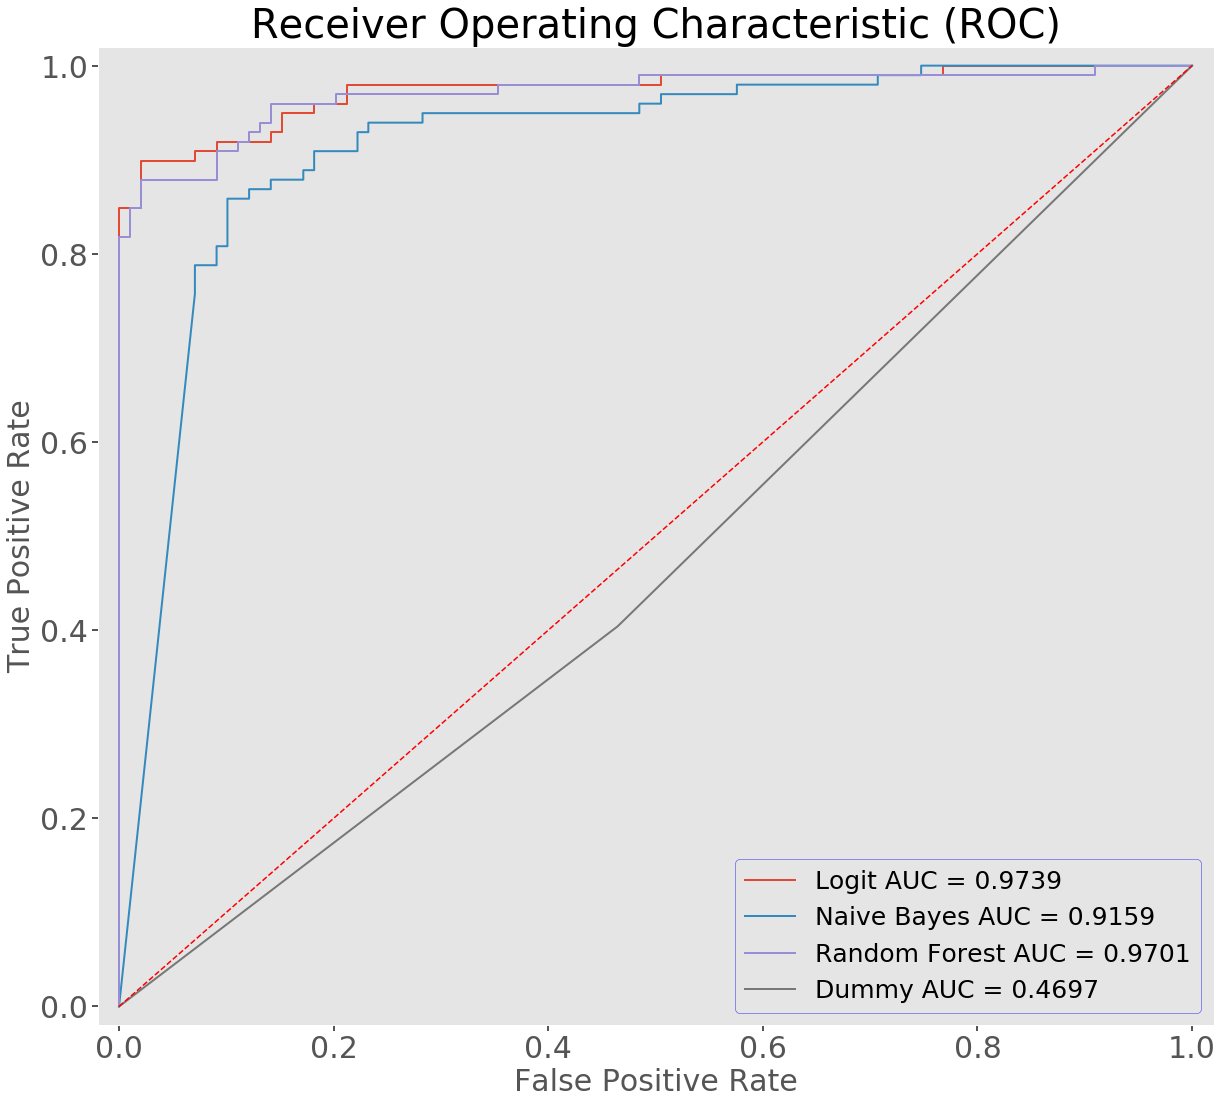

In [24]:
#in sample
roc_scores(X_val_under,y_val_under)

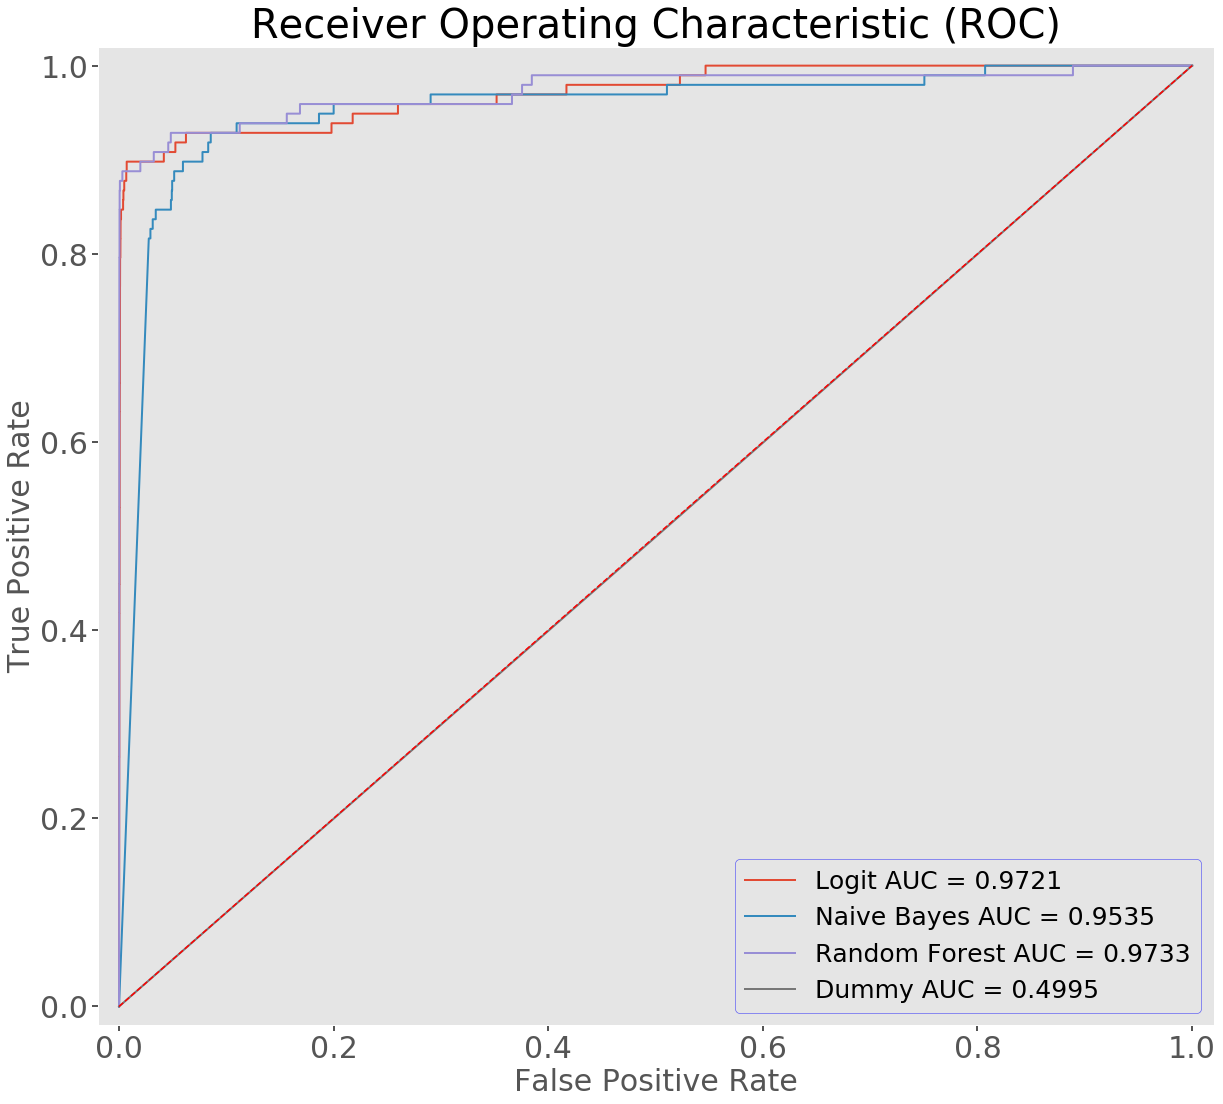

In [25]:
#out of sample
roc_scores(X_test,y_test)

Recall (True Positive Rate): % of all fraudulent transactions cases captured  
Precision: Out of all items labeled as fraud, what percentage of them is actually fraud?  
False Positive Rate:

Accuracy: How correct the model is (misleading for fraud/imbalanced data) 

F1 score: combination of recall and precision into one metric. F1 score is the weighted average of precision and recall, taking BOTH false positives and false negatives into account. Usually much more useful than accuracy, especially with uneven classes.  



# Find the best threshold for each model

In [26]:
def find_best_threshold(model, int_num_steps):
    highest_f1 = 0
    best_threshold = 0
    for threshold in np.linspace (0, 1, int_num_steps):
        y_predict = (model.predict_proba(X_val_under)[:, 1] >= threshold) 
        f1 = f1_score(y_val_under,y_predict)
        acc = accuracy_score(y_val_under,y_predict)
        rec = recall_score(y_val_under,y_predict)
        pre = precision_score(y_val_under,y_predict)
        if f1 > highest_f1:
            best_threshold, highest_f1, best_acc, best_rec, best_pre  = \
                threshold, f1, acc, rec, pre
    return best_threshold, highest_f1, best_acc, best_rec, best_pre

In [27]:
models = [logistic_grid, gnb_best, rf_grid]
model_names = ["Logistic Regression", "Naive-Bayes", "Random Forest"]
chart = list()
for item,name in zip(models,model_names):
    best_thresh, high_f1, high_acc, high_rec, high_pre = find_best_threshold(item,20)
#     print(f'Results for {name}:')
#     print('Best Threshold: ', best_thresh)
#     print('Highest_f1: ', high_f1)
    chart.append([name, best_thresh, high_f1, high_acc, high_rec, high_pre])

In [28]:
chart = pd.DataFrame(chart, columns=['Model', 'Best Threshhold','F1 Score','Accuracy','Recall','Precision'])

In [29]:
chart

,Model,Best Threshhold,F1 Score,Accuracy,Recall,Precision
0,Logistic Regression,0.737,0.937,0.939,0.899,0.978
1,Naive-Bayes,0.053,0.870,0.874,0.848,0.894
2,Random Forest,0.421,0.926,0.929,0.879,0.978


# Confusion Matrix

In [30]:
def make_confusion_matrix_val(model, threshold=0.5):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    y_predict = (model.predict_proba(X_val_under)[:, 1] >= threshold)
    fraud_confusion = confusion_matrix(y_val_under, y_predict)
    plt.figure(dpi=100)
    sns.heatmap(fraud_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['Not Fraud', 'Fraud'],
           yticklabels=['Not Fraud', 'Fraud']);
    TP = fraud_confusion[0][0]
    FP = fraud_confusion[0][1]
    FN = fraud_confusion[1][0]
    TN = fraud_confusion[1][1]
    plt.yticks(rotation = 0)
    plt.title('Predicted vs. Actual',fontname = '.SF Compact Display',fontsize = 20,pad = 10);
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

In [31]:
# #interactive confusion matrix
# from ipywidgets import interactive, FloatSlider

# interactive(lambda threshold: make_confusion_matrix(rf_grid, threshold), threshold=(0.0,1.0,0.02))


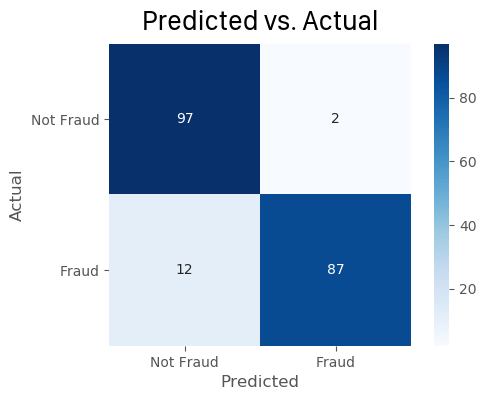

In [32]:
#fixed confusion matrix - random forest, validation
make_confusion_matrix_val(rf_grid, threshold=0.421)

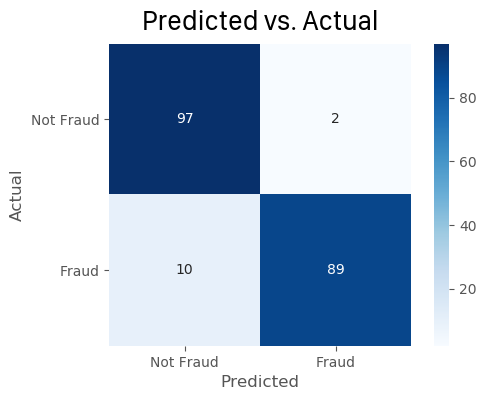

In [33]:
#fixed confusion matrix - logit, validation
make_confusion_matrix_val(logistic_grid, threshold=0.737)

In [34]:
def make_confusion_matrix_test(model, threshold=0.5):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    y_predict = (model.predict_proba(X_test)[:, 1] >= threshold)
    fraud_confusion = confusion_matrix(y_test, y_predict)
    plt.figure(dpi=100)
    sns.heatmap(fraud_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['Not Fraud', 'Fraud'],
           yticklabels=['Not Fraud', 'Fraud']);
    TP = fraud_confusion[0][0]
    FP = fraud_confusion[0][1]
    FN = fraud_confusion[1][0]
    TN = fraud_confusion[1][1]
    plt.yticks(rotation = 0)
    plt.title('Predicted vs. Actual',fontname = '.SF Compact Display',fontsize = 20,pad = 10);
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

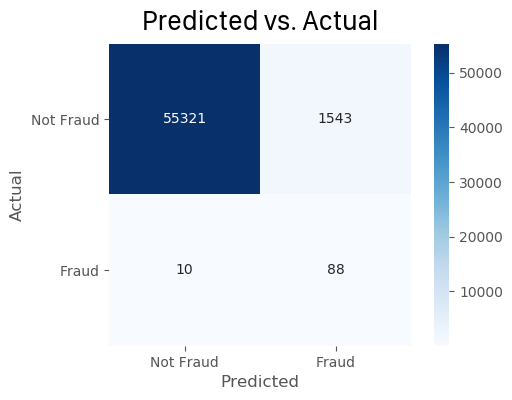

In [35]:
#fixed confusion matrix - random forest, test
make_confusion_matrix_test(rf_grid, threshold=0.421)

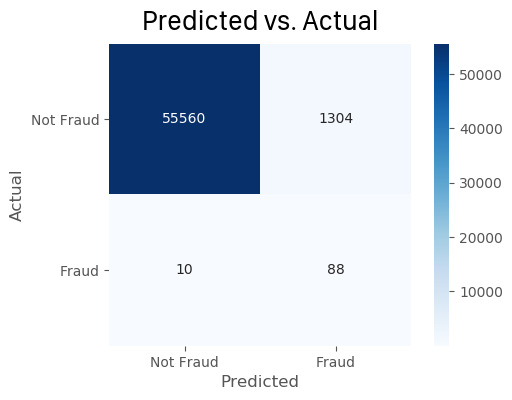

In [36]:
#fixed confusion matrix - logit, test
make_confusion_matrix_test(logistic_grid, threshold=0.737)